In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this project we are going to work on what is necessary to be successful on spotify and have a song in the top 100 most listened to in history

In [3]:
df=pd.read_csv("../Canciones spotify/listaspotify.csv ")

In [51]:
df.head()

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,"3,327",Ed Sheeran,6 January 2017
1,2,Blinding Lights,"3,323",The Weeknd,29 November 2019
2,3,Dance Monkey,"2,721",Tones And I,10 May 2019
3,4,Someone You Loved,"2,588",Lewis Capaldi,8 November 2018
4,5,Rockstar,"2,570",Post Malone featuring 21 Savage,15 September 2017


La primer pregunta que nos vamos a hacer es que artista tiene mas probabilidades de tener exito en spotify

In [5]:
top_artist=df["Artist"].value_counts()

Entendemos como artistas top a aquellos artistas los cuales tienen mas de una cancion en el top100

In [6]:
top_artist15=top_artist.head(15).to_dict()
x=top_artist15.keys()
y=top_artist15.values()

C:\Users\Tomás Navarro\AppData\Local\Temp\ipykernel_7424\324170213.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


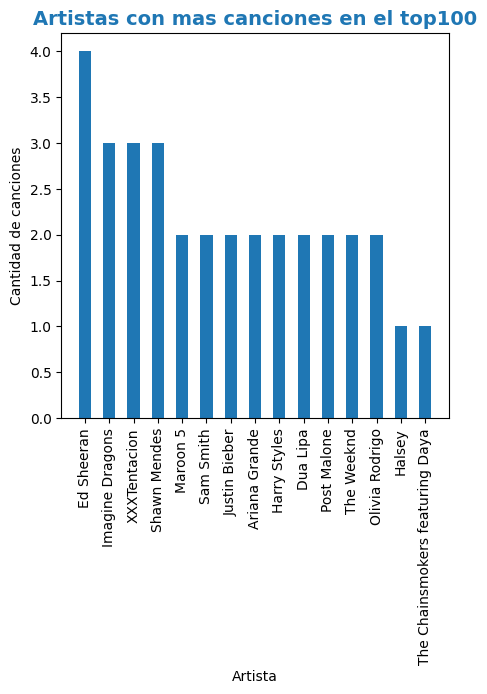

In [13]:
fig, ax = plt.subplots()
ax.bar(x, y,width = 0.5) 
ax.set_xticklabels(x, rotation=90)
fig.set_size_inches(5, 5)
ax.set_title('Artistas con mas canciones en el top100', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Artista')
ax.set_ylabel('Cantidad de canciones')

plt.show()

Como podemos ver en el grafico el artista que mas canciones tiene es Ed Sheeran seguido por imagine dragons, XXXTentatcion, shawn Mendes todos ellos con tres canciones cada uno y luego ya arrancan los de 2 canciones. Por lo que si queremos tener exito asegurado tenemos que trabajar con alguno de estos artistas

En la siguiente pregunta vamos a responder cuantas reproducciones tienen los artistas solo con sus mejores canciones en el top100

In [98]:
df.rename(columns={"Streams (Billions)":"Streams"})

,Rank,Song,Streams,Artist,Release Date
0,1,Shape of You,"3,327",Ed Sheeran,6 January 2017
1,2,Blinding Lights,"3,323",The Weeknd,29 November 2019
2,3,Dance Monkey,"2,721",Tones And I,10 May 2019
3,4,Someone You Loved,"2,588",Lewis Capaldi,8 November 2018
4,5,Rockstar,"2,570",Post Malone featuring 21 Savage,15 September 2017
...,...,...,...,...,...
95,96,I'm Yours,"1,490",Jason Mraz,12 February 2008
96,97,Despacito,"1,490",Luis Fonsi featuring Daddy Yankee,12 January 2017
97,98,Smells Like Teen Spirit,"1,487",Nirvana,10 September 1991
98,99,Sugar,"1,480",Maroon 5,29 August 2014


In [113]:
df["Streams (Billions)"] = df["Streams (Billions)"].replace({',':""}, regex=True)

In [115]:
df["Streams (Billions)"]=df["Streams (Billions)"].astype(int)

In [133]:
reprod=df.groupby(["Artist"])["Streams (Billions)"].apply(lambda x:x.sum())
mas_repro=reprod.nlargest(15).to_dict()
mas_repro

{'Ed Sheeran': 9761,
 'Imagine Dragons': 5806,
 'XXXTentacion': 5368,
 'The Weeknd': 5044,
 'Shawn Mendes': 4694,
 'Dua Lipa': 3889,
 'Harry Styles': 3768,
 'Justin Bieber': 3669,
 'Post Malone': 3607,
 'Ariana Grande': 3483,
 'Olivia Rodrigo': 3368,
 'Sam Smith': 3271,
 'Maroon 5': 3101,
 'Tones And I': 2721,
 'Lewis Capaldi': 2588}

In [130]:
x=mas_repro.keys()
y=mas_repro.values()

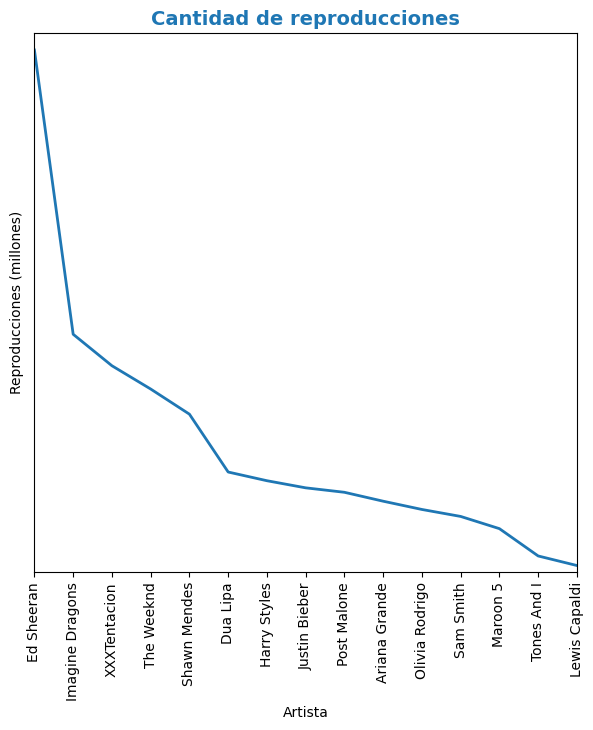

In [161]:
colores = ['cyan','red','yellow','navy','orange','red','darkblue','gold','blue','orange','red','green','limegreen','blue','red','lightskyblue']
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 1), xticks=np.arange(0, 15),
       ylim=(2500, 10000), yticks=np.arange(2500, 1000))

ax.set_xticklabels(x, rotation=90)
fig.set_size_inches(7, 7)
ax.set_title('Cantidad de reproducciones', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Artista')
ax.set_ylabel('Reproducciones (millones)')

plt.show()

In [162]:
df.head(10)

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,3327,Ed Sheeran,6 January 2017
1,2,Blinding Lights,3323,The Weeknd,29 November 2019
2,3,Dance Monkey,2721,Tones And I,10 May 2019
3,4,Someone You Loved,2588,Lewis Capaldi,8 November 2018
4,5,Rockstar,2570,Post Malone featuring 21 Savage,15 September 2017
5,6,Sunflower,2502,Post Malone and Swae Lee,18 October 2018
6,7,One Dance,2491,Drake featuring Wizkid and Kyla,5 April 2016
7,8,Closer,2430,The Chainsmokers featuring Halsey,29 July 2016
8,9,Believer,2326,Imagine Dragons,1 February 2017
9,10,Señorita,2305,Shawn Mendes and Camila Cabello,21 June 2019


Aca podemos observar como hay artistas que tienen canciones en el top10 de las mas escuchadas de spotify y aun asi no estan en los artistas mas escuchados, por ejemplo Halsey. Pero es un caso aislado el de Halsey, podemos decir que es OneHitArtist jajajajaj, el resto sigue la logica y los artistas mas escuchados son tambien los que mas canciones tienen en el top100 de las mas escuchadas de spotify

Ahora vamos a ver si existe una relacion entre el mes de lanzamiento y el exito


In [4]:
top_fecha=df[["Song","Streams (Billions)","Release Date"]]

In [19]:
pd.to_datetime(top_fecha["Release Date"],dayfirst=True,yearfirst=False)
top_fecha["Release Date"] = top_fecha["Release Date"].replace({',':""}, regex=True

0    2017-01-06
1    2019-11-29
2    2019-05-10
3    2018-11-08
4    2017-09-15
        ...    
95   2008-02-12
96   2017-01-12
97   1991-09-10
98   2014-08-29
99   2020-04-17
Name: Release Date, Length: 100, dtype: datetime64[ns]

In [25]:
meses=pd.DatetimeIndex(top_fecha["Release Date"]).month.value_counts().to_dict()
x1=meses.keys()
y1=meses.values()
print(x1,y1)

dict_keys([4, 9, 3, 5, 6, 8, 10, 11, 1, 7, 2, 12]) dict_values([14, 11, 11, 10, 10, 10, 9, 8, 6, 5, 4, 2])


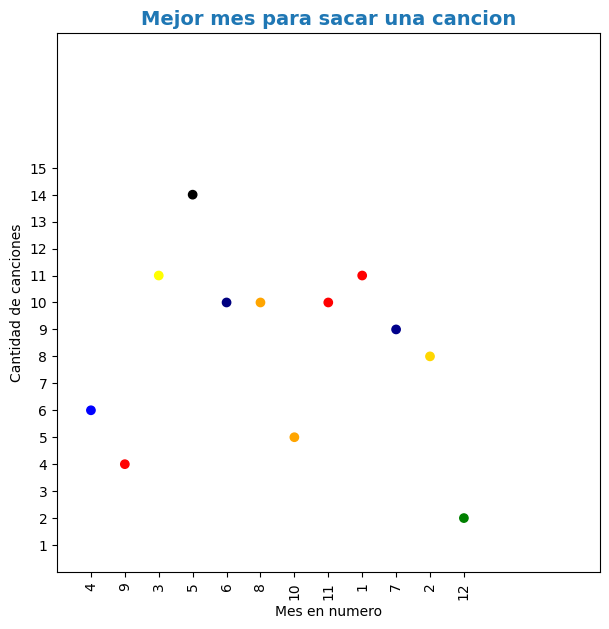

In [38]:
colores = ['black','red','yellow','navy','orange','red','darkblue','gold','blue','orange','red','green']
fig, ax = plt.subplots()

ax.scatter(x1, y1, c=colores, vmin=0, vmax=100)

ax.set(xlim=(0, 16), xticks=np.arange(1, 13),
       ylim=(0, 20), yticks=np.arange(1, 16))
ax.set_xticklabels(x1, rotation=90)
fig.set_size_inches(7, 7)
ax.set_title('Mejor mes para sacar una cancion', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Mes en numero')
ax.set_ylabel('Cantidad de canciones')

plt.show()

Para este analisis nos vamos a quedar con aquellos meses que tienen 10 o mas canciones. Como los meses mas influyentes. Estos meses son: 1,3,4,6,8,11 Por lo que podemos concluir que no hay una relacion clara entre el mes y la estacion del año. Por lo que el conocido como "El tema del verano" no tendria sentido si vemos en realidad que no importa cuando saquen la cancion, solamente importa que esta sea buena. 

Conclusion:
Para concluir este proyecto podemos determinar que el artista que saca la cancion es muy influyente a la hora de realizar un hit, que los artistas con mas reproducciones es probable que saquen un hit historico y que no existe una correlacion entre el mes y la estacion del año y el exito de la cancion